# Типы и структуры данных. ЛР2

Алгоритмы умножения матриц

1. Стандартный
1. Алгоритм Винограда базовый
1. Алгоритм Винограда оптимизированный

In [1]:
# !pip install pandas

In [2]:
import pandas as pd
import numpy as np
import random
import time

from random import randint as rand

In [3]:
# вводим матрицы
matrix_a = [
    [1, 2, 3], 
    [4, 5, 6]
]
matrix_b = [
    [7, 10, 13, -1], 
    [8, 11, 14, -2], 
    [9, 12, 15, -3]
]

matrix_c = [
    [1, 2],
    [4, 5]
]
matrix_d = [
    [7, 10, 13, -1],
    [8, 11, 14, -2]
]

# кол-во экспериментов
exp_num = 10000

# Стандартный алгоритм умножения матриц

In [4]:
def standart_matrix_multiply(A, B):
    if len(A[0]) != len(B):
      print("Ошибка! Невозможно перемножить матрицы, т.к. они не совместимы.")
      return
    
    rows_A = len(A)
    cols_A = len(A[0])
    rows_B = len(B)
    cols_B = len(B[0])
    
    # Создаем матрицу результатов C[rows_A x cols_B] (C[MxQ])
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    for i in range(rows_A):
        for j in range(cols_B):
            for k in range(cols_A):
                C[i][j] = C[i][j] + A[i][k] * B[k][j]
                
    return C

In [5]:
print('Стандартный алгоритм, матрицы A, B')
start = time.process_time()
for i in range(exp_num - 1):
    standart_matrix_multiply(matrix_a, matrix_b)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(standart_matrix_multiply(matrix_a, matrix_b))}")

Стандартный алгоритм, матрицы A, B
Время выполнения 10000 экспериментов: 0.08197643200000004 сек
Среднее время одного эксперимента: 8.197643200000005e-06 сек
Результат умножения: 
[[ 50  68  86 -14]
 [122 167 212 -32]]


In [6]:
print('Стандартный алгоритм, матрицы C, D')
start = time.process_time()
for i in range(exp_num - 1):
    standart_matrix_multiply(matrix_c, matrix_d)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(standart_matrix_multiply(matrix_c, matrix_d))}")

Стандартный алгоритм, матрицы C, D
Время выполнения 10000 экспериментов: 0.08884082900000001 сек
Среднее время одного эксперимента: 8.8840829e-06 сек
Результат умножения: 
[[ 23  32  41  -5]
 [ 68  95 122 -14]]


# Алгоритм Винограда базовый

In [7]:
#  A[M * N] * B [N * Q]
def vinograd_matrix_multiply(A, B):
    if len(A[0]) != len(B):
      print("Ошибка! Невозможно перемножить матрицы, т.к. они не совместимы.")
      return
    
    rows_A = len(A)     # a  M
    cols_A = len(A[0])  # b  N
    rows_B = len(B)     # b  N
    cols_B = len(B[0])  # c  Q
    
    # Создаем матрицу результатов C[rows_A x cols_B] (C[MxQ])
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    # вычисление row_factors для A
    row_factor_A = [0 for col in range(rows_A)]
    for i in range(rows_A):
        for j in range(cols_A // 2):
            row_factor_A[i] = row_factor_A[i] + A[i][j * 2] * A[i][j * 2 + 1]
    
    # вычисление column_factors для B
    col_factor_B = [0 for row in range(cols_B)]
    for i in range(cols_B):
        for j in range(cols_A // 2):
            col_factor_B[i] = col_factor_B[i] + B[j * 2][i] * B[j * 2 + 1][i]
    
    # заполнение матрицы C
    for i in range(rows_A):
        for j in range(cols_B):
            C[i][j] = -row_factor_A[i] - col_factor_B[j]
            for k in range(cols_A // 2):
                C[i][j] = C[i][j] + (A[i][2 * k] + B[2 * k + 1][j]) * (A[i][2 * k + 1] + B[2 * k][j])
    
    # прибавление членов в случае нечетной общей размерности
    if cols_A % 2 == 1:
        for i in range(rows_A):
            for j in range(cols_B):
                C[i][j] = C[i][j] + A[i][cols_A - 1] * B[cols_A - 1][j]
                
                
    return C

In [8]:
print('Алгоритм Винограда базовый, матрицы A, B')
start = time.process_time()
for i in range(exp_num - 1):
    vinograd_matrix_multiply(matrix_a, matrix_b)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(vinograd_matrix_multiply(matrix_a, matrix_b))}")

Алгоритм Винограда базовый, матрицы A, B
Время выполнения 10000 экспериментов: 0.205292166 сек
Среднее время одного эксперимента: 2.05292166e-05 сек
Результат умножения: 
[[ 50  68  86 -14]
 [122 167 212 -32]]


In [9]:
print('Алгоритм Винограда базовый, матрицы C, D')
start = time.process_time()
for i in range(exp_num - 1):
    vinograd_matrix_multiply(matrix_c, matrix_d)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(vinograd_matrix_multiply(matrix_c, matrix_d))}")

Алгоритм Винограда базовый, матрицы C, D
Время выполнения 10000 экспериментов: 0.12131929900000005 сек
Среднее время одного эксперимента: 1.2131929900000005e-05 сек
Результат умножения: 
[[ 23  32  41  -5]
 [ 68  95 122 -14]]


# Алгоритм Винограда оптимизированный

In [10]:
# k * 2 ~ k << 1
def optimized_vinograd_matrix_multiply(A, B):
    if len(A[0]) != len(B):
        print("Ошибка! Невозможно перемножить матрицы, т.к. они не совместимы.")
        return
    
    rows_A = len(A)     # a  M
    cols_A = len(A[0])  # b  N
    rows_B = len(B)     # b  N
    cols_B = len(B[0])  # c  Q
    
    # Создаем матрицу результатов C[rows_A x cols_B] (C[MxQ])
    C = [[0 for row in range(cols_B)] for col in range(rows_A)]

    # вычисление row_factors для A
    row_factor_A = [0 for col in range(rows_A)]
    for i in range(rows_A):
        for j in range(1, cols_A, 2):
            row_factor_A[i] -= A[i][j - 1] * A[i][j]
            
    # вычисление column_factors для B
    col_factor_B = [0 for row in range(cols_B)]
    for i in range(cols_B):
        for j in range(1, cols_A, 2):
            col_factor_B[i] -= B[j - 1][i] * B[j][i]
            
    # заполнение матрицы C
    for i in range(rows_A):
        for j in range(cols_B):
            buf = row_factor_A[i] + col_factor_B[j]
            for k in range(1, cols_A, 2):
                buf += (A[i][k - 1] + B[k][j]) * (A[i][k] + B[k - 1][j])
            C[i][j] = buf
                
    # прибавление членов в случае нечетной общей размерности
    if cols_A % 2 == 1:
        for i in range(rows_A):
            for j in range(cols_B):
                C[i][j] += A[i][cols_A - 1] * B[cols_A - 1][j]


    return C

In [11]:
print('Алгоритм Винограда оптимизированный, матрицы A, B')
start = time.process_time()
for i in range(exp_num - 1):
    optimized_vinograd_matrix_multiply(matrix_a, matrix_b)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(optimized_vinograd_matrix_multiply(matrix_a, matrix_b))}")

Алгоритм Винограда оптимизированный, матрицы A, B
Время выполнения 10000 экспериментов: 0.17144072799999988 сек
Среднее время одного эксперимента: 1.7144072799999987e-05 сек
Результат умножения: 
[[ 50  68  86 -14]
 [122 167 212 -32]]


In [12]:
print('Алгоритм Винограда оптимизированный, матрицы C, D')
start = time.process_time()
for i in range(exp_num - 1):
    optimized_vinograd_matrix_multiply(matrix_c, matrix_d)
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{np.matrix(optimized_vinograd_matrix_multiply(matrix_c, matrix_d))}")

Алгоритм Винограда оптимизированный, матрицы C, D
Время выполнения 10000 экспериментов: 0.12619267099999987 сек
Среднее время одного эксперимента: 1.2619267099999987e-05 сек
Результат умножения: 
[[ 23  32  41  -5]
 [ 68  95 122 -14]]


# Умножение матриц с помощью библиотеки [NumPy](https://numpy.org/)

In [13]:
ma = np.matrix(matrix_a)
mb = np.matrix(matrix_b)
mc = np.matrix(matrix_c)
md = np.matrix(matrix_d)

display(ma, mb, mc, md)

matrix([[1, 2, 3],
        [4, 5, 6]])

matrix([[ 7, 10, 13, -1],
        [ 8, 11, 14, -2],
        [ 9, 12, 15, -3]])

matrix([[1, 2],
        [4, 5]])

matrix([[ 7, 10, 13, -1],
        [ 8, 11, 14, -2]])

In [14]:
print('Библиотека NumPy, матрицы A, B')
start = time.process_time()
for i in range(exp_num - 1):
    ma * mb
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{ma * mb}")

Библиотека NumPy, матрицы A, B
Время выполнения 10000 экспериментов: 0.10165072599999991 сек
Среднее время одного эксперимента: 1.0165072599999992e-05 сек
Результат умножения: 
[[ 50  68  86 -14]
 [122 167 212 -32]]


In [15]:
print('Библиотека NumPy, матрицы C, D')
start = time.process_time()
for i in range(exp_num - 1):
    mc * md
elapsed = (time.process_time() - start)
print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
print(f"Результат умножения: \n{mc * md}")

Библиотека NumPy, матрицы C, D
Время выполнения 10000 экспериментов: 0.1507913120000004 сек
Среднее время одного эксперимента: 1.507913120000004e-05 сек
Результат умножения: 
[[ 23  32  41  -5]
 [ 68  95 122 -14]]


# Оценка сложности алгоритмов при перемножении квадратных матриц различных размерностей

In [16]:
def random_binary_matrix(row, col):
    matrix = []
    for i in range(row):
        bin = []
        for j in range(col):
            if random.randint(0, 1) == 0:
                bin.append(0)
            else:
                bin.append(1)
        matrix.append(bin)

    return matrix

In [17]:
def random_matrix(row, col):
    matrix = []
    for i in range(row):
        matrix.append([])
        for j in range(col):
            matrix[i].append(rand(0, 9))

    return matrix

In [18]:
random_matrix(3, 3)

[[8, 1, 3], [7, 7, 8], [1, 8, 0]]

In [19]:
def algo_complexity(dims, exp_num=10):
    print(f'\nМатрицы {dims}х{dims}')
    matrix_A = random_matrix(dims, dims)
    matrix_B = random_matrix(dims, dims)
    exp_num = exp_num
    print('\nСтандартный алгоритм')
    start = time.process_time()
    for i in range(exp_num - 1):
        standart_matrix_multiply(matrix_A, matrix_B)
    elapsed = (time.process_time() - start)
    print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
    print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
    standart = elapsed / exp_num

    print('\nАлгоритм Винограда базовый')
    start = time.process_time()
    for i in range(exp_num - 1):
        vinograd_matrix_multiply(matrix_A, matrix_B)
    elapsed = (time.process_time() - start)
    print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
    print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
    vinograd = elapsed / exp_num

    print('\nАлгоритм Винограда оптимизированный')
    start = time.process_time()
    for i in range(exp_num - 1):
        optimized_vinograd_matrix_multiply(matrix_A, matrix_B)
    elapsed = (time.process_time() - start)
    print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
    print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
    vinograd_optimized = elapsed / exp_num

    ma = np.matrix(matrix_A)
    mb = np.matrix(matrix_B)

    print('\nБиблиотека NumPy')
    start = time.process_time()
    for i in range(exp_num - 1):
        ma * mb
    elapsed = (time.process_time() - start)
    print(f'Время выполнения {exp_num} экспериментов: {elapsed} сек')
    print(f'Среднее время одного эксперимента: {elapsed / exp_num} сек')
    numpy_lib = elapsed / exp_num
    
    return standart, vinograd, vinograd_optimized, numpy_lib

In [20]:
std_100, vin_100, vin_opt_100, numpy_100 = algo_complexity(100)


Матрицы 100х100

Стандартный алгоритм
Время выполнения 10 экспериментов: 1.7832685959999997 сек
Среднее время одного эксперимента: 0.17832685959999997 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 1.715132488 сек
Среднее время одного эксперимента: 0.17151324880000002 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 1.3551872639999996 сек
Среднее время одного эксперимента: 0.13551872639999996 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.00871215000000003 сек
Среднее время одного эксперимента: 0.000871215000000003 сек


In [21]:
std_200, vin_200, vin_opt_200, numpy_200 = algo_complexity(200)


Матрицы 200х200

Стандартный алгоритм
Время выполнения 10 экспериментов: 14.707936241000002 сек
Среднее время одного эксперимента: 1.4707936241000001 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 14.288602329 сек
Среднее время одного эксперимента: 1.4288602329 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 9.087642484 сек
Среднее время одного эксперимента: 0.9087642484 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.061626741999994294 сек
Среднее время одного эксперимента: 0.006162674199999429 сек


In [22]:
std_300, vin_300, vin_opt_300, numpy_300 = algo_complexity(300)


Матрицы 300х300

Стандартный алгоритм
Время выполнения 10 экспериментов: 41.71259765 сек
Среднее время одного эксперимента: 4.171259765 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 39.743719311999996 сек
Среднее время одного эксперимента: 3.9743719311999994 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 26.842495912000004 сек
Среднее время одного эксперимента: 2.6842495912000004 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.2262091370000121 сек
Среднее время одного эксперимента: 0.02262091370000121 сек


In [23]:
std_400, vin_400, vin_opt_400, numpy_400 = algo_complexity(400)


Матрицы 400х400

Стандартный алгоритм
Время выполнения 10 экспериментов: 98.61172453 сек
Среднее время одного эксперимента: 9.861172453 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 100.33665092800001 сек
Среднее время одного эксперимента: 10.033665092800002 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 66.455197537 сек
Среднее время одного эксперимента: 6.6455197537 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.7109643469999583 сек
Среднее время одного эксперимента: 0.07109643469999583 сек


In [24]:
std_500, vin_500, vin_opt_500, numpy_500 = algo_complexity(500)


Матрицы 500х500

Стандартный алгоритм
Время выполнения 10 экспериментов: 197.63753344499997 сек
Среднее время одного эксперимента: 19.763753344499996 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 221.89923819900002 сек
Среднее время одного эксперимента: 22.189923819900002 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 138.32442330600009 сек
Среднее время одного эксперимента: 13.832442330600008 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 1.59210331700001 сек
Среднее время одного эксперимента: 0.159210331700001 сек


In [25]:
std_101, vin_101, vin_opt_101, numpy_101 = algo_complexity(101)


Матрицы 101х101

Стандартный алгоритм
Время выполнения 10 экспериментов: 1.6129848839999568 сек
Среднее время одного эксперимента: 0.16129848839999567 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 1.461723548000009 сек
Среднее время одного эксперимента: 0.1461723548000009 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 1.0527788790000159 сек
Среднее время одного эксперимента: 0.10527788790000159 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.007855226000060611 сек
Среднее время одного эксперимента: 0.0007855226000060611 сек


In [26]:
std_201, vin_201, vin_opt_201, numpy_201 = algo_complexity(201)


Матрицы 201х201

Стандартный алгоритм
Время выполнения 10 экспериментов: 12.422006298000042 сек
Среднее время одного эксперимента: 1.2422006298000041 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 11.540124229000071 сек
Среднее время одного эксперимента: 1.154012422900007 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 7.905133542000044 сек
Среднее время одного эксперимента: 0.7905133542000045 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.06415368000000399 сек
Среднее время одного эксперимента: 0.006415368000000398 сек


In [27]:
std_301, vin_301, vin_opt_301, numpy_301 = algo_complexity(301)


Матрицы 301х301

Стандартный алгоритм
Время выполнения 10 экспериментов: 41.14900138100006 сек
Среднее время одного эксперимента: 4.1149001381000065 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 39.261659345 сек
Среднее время одного эксперимента: 3.9261659344999997 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 26.880216768000082 сек
Среднее время одного эксперимента: 2.688021676800008 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.21244340700013709 сек
Среднее время одного эксперимента: 0.021244340700013707 сек


In [28]:
std_401, vin_401, vin_opt_401, numpy_401 = algo_complexity(401)


Матрицы 401х401

Стандартный алгоритм
Время выполнения 10 экспериментов: 99.13505042499992 сек
Среднее время одного эксперимента: 9.913505042499992 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 101.54136418299981 сек
Среднее время одного эксперимента: 10.15413641829998 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 64.19790044199999 сек
Среднее время одного эксперимента: 6.419790044199999 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 0.8356533480000508 сек
Среднее время одного эксперимента: 0.08356533480000508 сек


In [29]:
std_501, vin_501, vin_opt_501, numpy_501 = algo_complexity(501)


Матрицы 501х501

Стандартный алгоритм
Время выполнения 10 экспериментов: 202.71044561999997 сек
Среднее время одного эксперимента: 20.271044561999997 сек

Алгоритм Винограда базовый
Время выполнения 10 экспериментов: 211.16049282599988 сек
Среднее время одного эксперимента: 21.116049282599988 сек

Алгоритм Винограда оптимизированный
Время выполнения 10 экспериментов: 126.06204086000002 сек
Среднее время одного эксперимента: 12.606204086000002 сек

Библиотека NumPy
Время выполнения 10 экспериментов: 1.70094865499982 сек
Среднее время одного эксперимента: 0.170094865499982 сек


# Графики

In [30]:
# !pip install matplotlib

In [31]:
import matplotlib.pyplot as plt

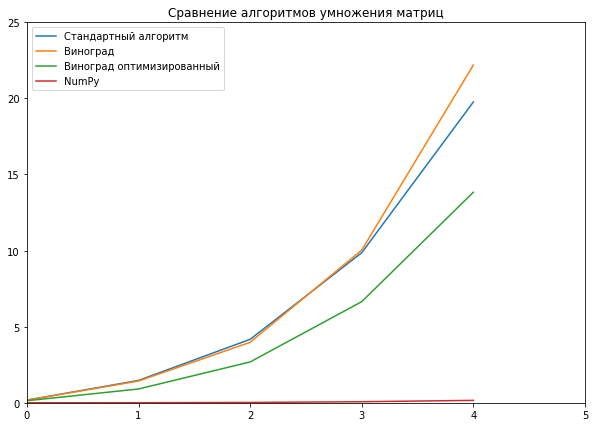

In [46]:
std_alg = [std_100, std_200, std_300, std_400, std_500]
vin_alg = [vin_100, vin_200, vin_300, vin_400, vin_500]
vin_opt_alg = [vin_opt_100, vin_opt_200, vin_opt_300, vin_opt_400, vin_opt_500]
numpy_alg = [numpy_100, numpy_200, numpy_300, numpy_400, numpy_500]

# plt.ioff()
fig, ax = plt.subplots(figsize=(10, 7))
data = {'Стандартный алгоритм': std_alg,
        'Виноград': vin_alg,
        'Виноград оптимизированный': vin_opt_alg,
        'NumPy': numpy_alg,
       }
df = pd.DataFrame(data)
x = np.arange(5)
plt.axis([0, 5, 0, 25])
plt.plot(x, df, linestyle='solid',)
ax.set_title('Сравнение алгоритмов умножения матриц')
plt.legend(data, loc=2)
plt.show()

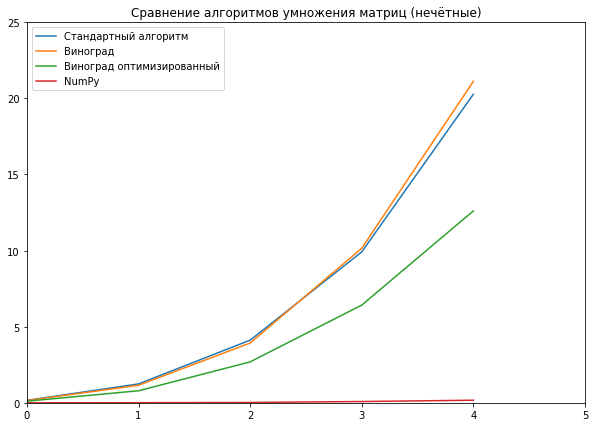

In [47]:
std_alg = [std_101, std_201, std_301, std_401, std_501]
vin_alg = [vin_101, vin_201, vin_301, vin_401, vin_501]
vin_opt_alg = [vin_opt_101, vin_opt_201, vin_opt_301, vin_opt_401, vin_opt_501]
numpy_alg = [numpy_101, numpy_201, numpy_301, numpy_401, numpy_501]

# plt.ioff()
fig, ax = plt.subplots(figsize=(10, 7))
data = {'Стандартный алгоритм': std_alg,
        'Виноград': vin_alg,
        'Виноград оптимизированный': vin_opt_alg,
        'NumPy': numpy_alg,
       }
df = pd.DataFrame(data)
x = np.arange(5)
plt.axis([0, 5, 0, 25])
plt.plot(x, df, linestyle='solid',)
ax.set_title('Сравнение алгоритмов умножения матриц (нечётные)')
plt.legend(data, loc=2)
plt.show()

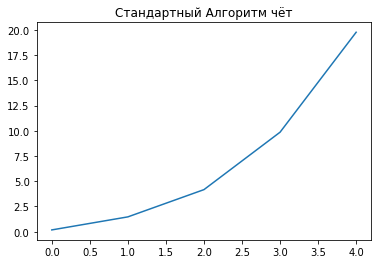

In [33]:
plt.plot([std_100, std_200, std_300, std_400, std_500])
plt.title('Стандартный Алгоритм чёт')
plt.show()

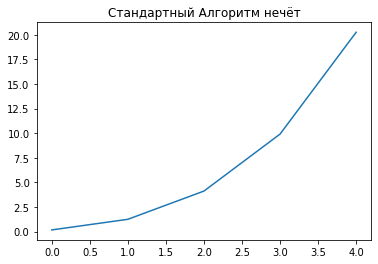

In [34]:
plt.plot([std_101, std_201, std_301, std_401, std_501])
plt.title('Стандартный Алгоритм нечёт')
plt.show()

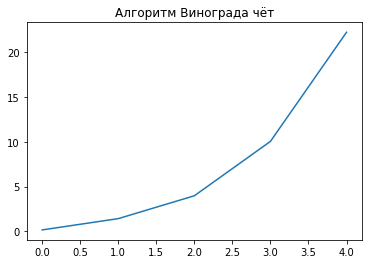

In [35]:
plt.plot([vin_100, vin_200, vin_300, vin_400, vin_500])
plt.title('Алгоритм Винограда чёт')
plt.show()

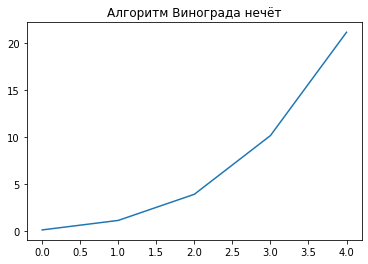

In [36]:
plt.plot([vin_101, vin_201, vin_301, vin_401, vin_501])
plt.title('Алгоритм Винограда нечёт')
plt.show()

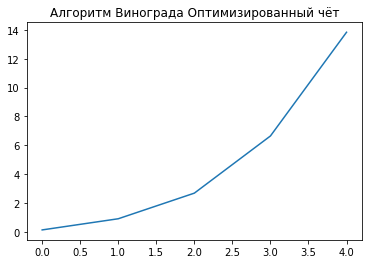

In [37]:
plt.plot([vin_opt_100, vin_opt_200, vin_opt_300, vin_opt_400, vin_opt_500])
plt.title('Алгоритм Винограда Оптимизированный чёт')
plt.show()

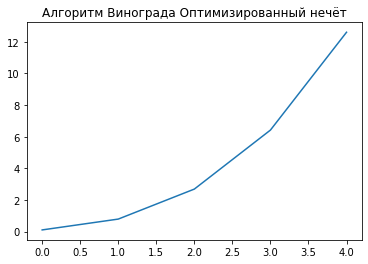

In [38]:
plt.plot([vin_opt_101, vin_opt_201, vin_opt_301, vin_opt_401, vin_opt_501])
plt.title('Алгоритм Винограда Оптимизированный нечёт')
plt.show()

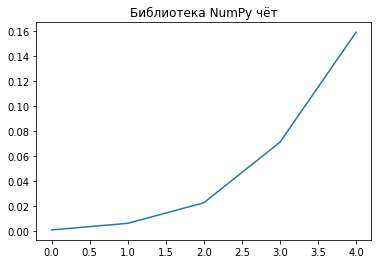

In [39]:
plt.plot([numpy_100, numpy_200, numpy_300, numpy_400, numpy_500])
plt.title('Библиотека NumPy чёт')
plt.show()

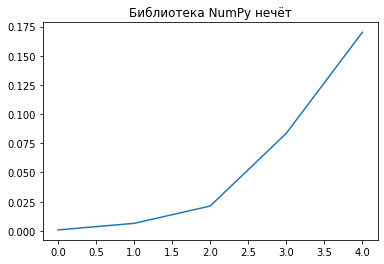

In [40]:
plt.plot([numpy_101, numpy_201, numpy_301, numpy_401, numpy_501])
plt.title('Библиотека NumPy нечёт')
plt.show()